# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Baca file CSV dari URL
data = pd.read_csv('/content/datasetdalamnotebookklasifikasi123.csv')

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head(50)

,species,length,weight,w_l_ratio,species_Encoded,lengthNorm,weightNorm,cluster
0,Anabas testudineus,10.66,3.45,0.32,0,0.221649,0.532319,1
1,Anabas testudineus,6.91,3.27,0.47,0,0.028351,0.463878,1
2,Anabas testudineus,8.38,3.46,0.41,0,0.104124,0.536122,1
3,Anabas testudineus,7.57,3.36,0.44,0,0.062371,0.498099,1
4,Anabas testudineus,10.83,3.38,0.31,0,0.230412,0.505703,1
5,Anabas testudineus,9.35,3.28,0.35,0,0.154124,0.467681,1
6,Anabas testudineus,9.42,3.33,0.35,0,0.157732,0.486692,1
7,Anabas testudineus,7.92,3.13,0.39,0,0.080412,0.410646,1
8,Anabas testudineus,6.98,3.16,0.45,0,0.031959,0.422053,1
9,Anabas testudineus,8.42,3.26,0.39,0,0.106186,0.460076,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   species          3525 non-null   object 
 1   length           3525 non-null   float64
 2   weight           3525 non-null   float64
 3   w_l_ratio        3525 non-null   float64
 4   species_Encoded  3525 non-null   int64  
 5   lengthNorm       3525 non-null   float64
 6   weightNorm       3525 non-null   float64
 7   cluster          3525 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 220.4+ KB


In [4]:
data.describe()

,length,weight,w_l_ratio,species_Encoded,lengthNorm,weightNorm,cluster
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,15.713231,3.431152,0.256933,3.510071,0.482125,0.525153,0.875177
std,5.472512,0.628108,0.126211,2.311503,0.282088,0.238824,0.779832
min,6.360000,2.050000,0.080000,0.000000,0.000000,0.000000,0.000000
25%,10.830000,3.030000,0.170000,2.000000,0.230412,0.372624,0.000000
50%,16.220000,3.250000,0.190000,4.000000,0.508247,0.456274,1.000000
75%,19.830000,3.920000,0.360000,5.000000,0.694330,0.711027,1.000000
max,25.760000,4.680000,0.590000,7.000000,1.000000,1.000000,2.000000


In [5]:
data = data.drop(columns=['species','w_l_ratio','length','weight'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,species_Encoded,lengthNorm,weightNorm,cluster
0,0,0.221649,0.532319,1
1,0,0.028351,0.463878,1
2,0,0.104124,0.536122,1
3,0,0.062371,0.498099,1
4,0,0.230412,0.505703,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['cluster'])
y = data['cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print(data['cluster'])

Training set shape: X_train=(2820, 3), y_train=(2820,)
Test set shape: X_test=(705, 3), y_test=(705,)
0       1
1       1
2       1
3       1
4       1
       ..
3520    2
3521    2
3522    2
3523    2
3524    2
Name: cluster, Length: 3525, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[261   0   0]
 [  0 286   0]
 [  0   0 158]]
Class 1:
  True Positive (TP): 261
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 444
----------------------------------------
Class 2:
  True Positive (TP): 286
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 419
----------------------------------------
Class 3:
  True Positive (TP): 158
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 547
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


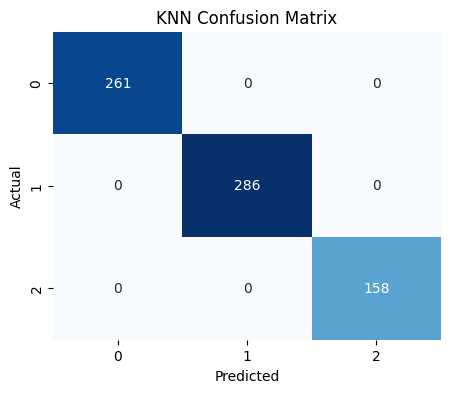

In [8]:
# Prediksi dengan model KNN
y_pred_knn = knn.predict(X_test)

# Menghitung confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan Confusion Matrix untuk multi-kelas
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)

# Menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_knn)):
    tp = cm_knn[i, i]  # True Positive (TP)
    fp = cm_knn[:, i].sum() - tp  # False Positive (FP)
    fn = cm_knn[i, :].sum() - tp  # False Negative (FN)
    tn = cm_knn.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

==== Decision Tree Classifier ====
Confusion Matrix:
[[261   0   0]
 [  0 286   0]
 [  0   0 158]]
Class 1:
  True Positive (TP): 261
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 444
----------------------------------------
Class 2:
  True Positive (TP): 286
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 419
----------------------------------------
Class 3:
  True Positive (TP): 158
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 547
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


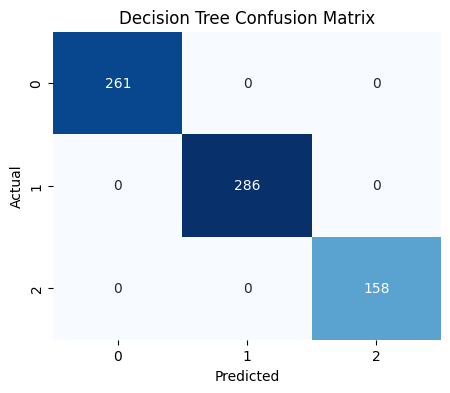

In [9]:
# Prediksi dengan model Decision Tree
y_pred_dt = dt.predict(X_test)

# Menghitung confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Menampilkan Confusion Matrix
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_dt)):
    tp = cm_dt[i, i]  # True Positive (TP)
    fp = cm_dt[:, i].sum() - tp  # False Positive (FP)
    fn = cm_dt[i, :].sum() - tp  # False Negative (FN)
    tn = cm_dt.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[261   0   0]
 [  0 286   0]
 [  0   0 158]]
Class 1:
  True Positive (TP): 261
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 444
----------------------------------------
Class 2:
  True Positive (TP): 286
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 419
----------------------------------------
Class 3:
  True Positive (TP): 158
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 547
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


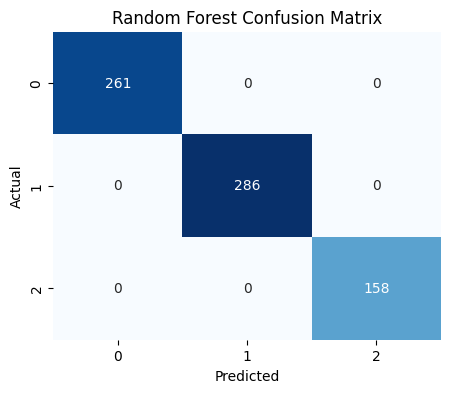

In [10]:
# Prediksi dengan model Random Forest
y_pred_rf = rf.predict(X_test)

# Menghitung confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan Confusion Matrix
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_rf)):
    tp = cm_rf[i, i]  # True Positive (TP)
    fp = cm_rf[:, i].sum() - tp  # False Positive (FP)
    fn = cm_rf[i, :].sum() - tp  # False Negative (FN)
    tn = cm_rf.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[261   0   0]
 [  0 286   0]
 [  0   0 158]]
Class 1:
  True Positive (TP): 261
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 444
----------------------------------------
Class 2:
  True Positive (TP): 286
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 419
----------------------------------------
Class 3:
  True Positive (TP): 158
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 547
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


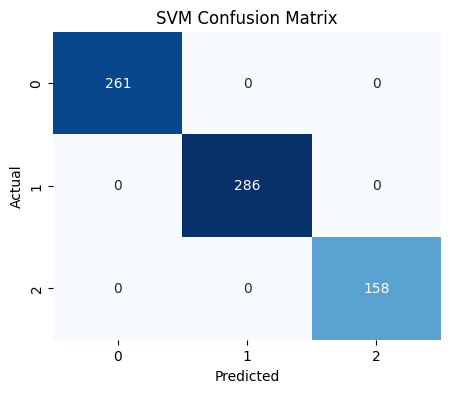

In [11]:
# Prediksi dengan model SVM
y_pred_svm = svm.predict(X_test)

# Menghitung confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Menampilkan Confusion Matrix
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_svm)):
    tp = cm_svm[i, i]  # True Positive (TP)
    fp = cm_svm[:, i].sum() - tp  # False Positive (FP)
    fn = cm_svm[i, :].sum() - tp  # False Negative (FN)
    tn = cm_svm.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Naive Bayes Classifier ====
Confusion Matrix:
[[261   0   0]
 [  0 286   0]
 [  0   0 158]]
Class 1:
  True Positive (TP): 261
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 444
----------------------------------------
Class 2:
  True Positive (TP): 286
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 419
----------------------------------------
Class 3:
  True Positive (TP): 158
  False Positive (FP): 0
  False Negative (FN): 0
  True Negative (TN): 547
----------------------------------------
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


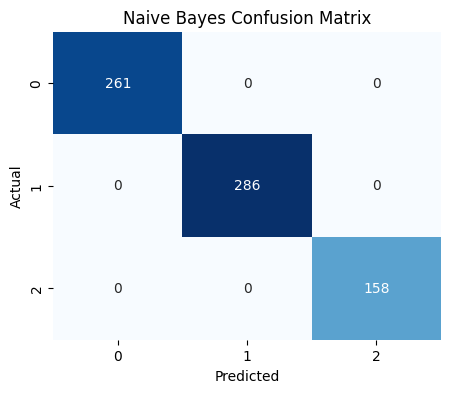

In [12]:
# Prediksi dengan model Naive Bayes
y_pred_nb = nb.predict(X_test)

# Menghitung confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Menampilkan Confusion Matrix
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)

# Untuk multi-class, menghitung TP, FP, FN, TN untuk setiap kelas
for i in range(len(cm_nb)):
    tp = cm_nb[i, i]  # True Positive (TP)
    fp = cm_nb[:, i].sum() - tp  # False Positive (FP)
    fn = cm_nb[i, :].sum() - tp  # False Negative (FN)
    tn = cm_nb.sum() - (tp + fp + fn)  # True Negative (TN)

    # Menampilkan hasil per kelas
    print(f"Class {i+1}:")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print("-"*40)

# Menampilkan metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb, average='macro'):.4f}")

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Random Forest Hyperparameters:", best_params_rf)
print("Best Random Forest Score:", best_score_rf)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best KNN Hyperparameters:", best_params_knn)
print("Best KNN Score:", best_score_knn)


Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Score: 1.0
Best KNN Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best KNN Score: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [15]:
# Menggunakan model dengan hyperparameter terbaik dari GridSearchCV
rf_best = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                 max_depth=best_params_rf['max_depth'],
                                 min_samples_split=best_params_rf['min_samples_split'],
                                 random_state=42)
rf_best.fit(X_train, y_train)

knn_best = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'],
                                weights=best_params_knn['weights'])
knn_best.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Random Forest (Setelah Tuning) - Accuracy: 1.0000
Random Forest (Setelah Tuning) - Precision: 1.0000
Random Forest (Setelah Tuning) - Recall: 1.0000
Random Forest (Setelah Tuning) - F1-Score: 1.0000


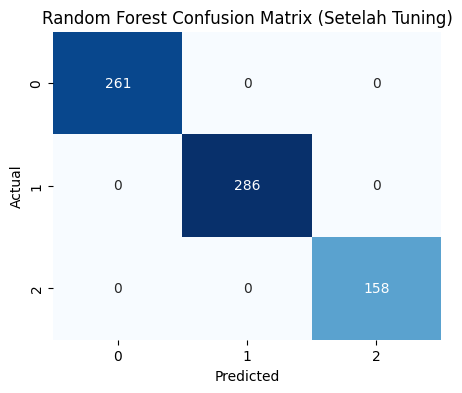

In [16]:
# Prediksi pada data uji
y_pred_rf_best = rf_best.predict(X_test)

# Evaluasi performa model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, average='macro')
recall_rf_best = recall_score(y_test, y_pred_rf_best, average='macro')
f1_rf_best = f1_score(y_test, y_pred_rf_best, average='macro')

# Menampilkan hasil evaluasi
print(f"Random Forest (Setelah Tuning) - Accuracy: {accuracy_rf_best:.4f}")
print(f"Random Forest (Setelah Tuning) - Precision: {precision_rf_best:.4f}")
print(f"Random Forest (Setelah Tuning) - Recall: {recall_rf_best:.4f}")
print(f"Random Forest (Setelah Tuning) - F1-Score: {f1_rf_best:.4f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Setelah Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN (Setelah Tuning) - Accuracy: 1.0000
KNN (Setelah Tuning) - Precision: 1.0000
KNN (Setelah Tuning) - Recall: 1.0000
KNN (Setelah Tuning) - F1-Score: 1.0000


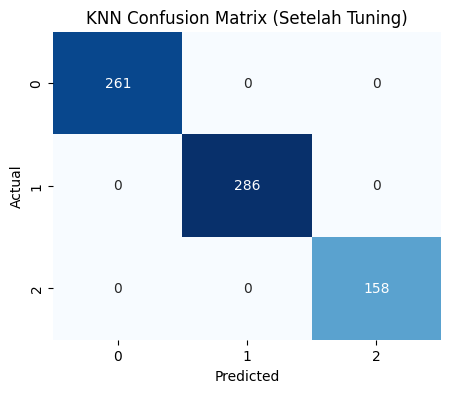

In [17]:
# Prediksi pada data uji
y_pred_knn_best = knn_best.predict(X_test)

# Evaluasi performa model
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
precision_knn_best = precision_score(y_test, y_pred_knn_best, average='macro')
recall_knn_best = recall_score(y_test, y_pred_knn_best, average='macro')
f1_knn_best = f1_score(y_test, y_pred_knn_best, average='macro')

# Menampilkan hasil evaluasi
print(f"KNN (Setelah Tuning) - Accuracy: {accuracy_knn_best:.4f}")
print(f"KNN (Setelah Tuning) - Precision: {precision_knn_best:.4f}")
print(f"KNN (Setelah Tuning) - Recall: {recall_knn_best:.4f}")
print(f"KNN (Setelah Tuning) - F1-Score: {f1_knn_best:.4f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_best), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix (Setelah Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
- Precision atau Recall rendah untuk kelas tertentu.
- Jawab:
  Berdasarkan hasil yang ditampilkan, salah satu data diambil dari model Random Forest Classifier menunjukkan akurasi, presisi, recall, dan F1-score yang sempurna (1.0000).
- Apakah model mengalami overfitting atau underfitting?
- Jawab:
  Semua metrik (precision, recall, dan F1-score) menunjukkan nilai 1.0000, yang berarti model memprediksi semua kelas dengan sempurna pada data pelatihan. Ini bisa menjadi indikasi bahwa model telah belajar dengan sangat baik terhadap data pelatihan, bahkan mungkin terlalu baik, sampai-sampai tidak ada kesalahan sama sekali. Hal ini sering kali merupakan tanda overfitting.
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
- Jawab : akan dilakukan
Validasi Silang, Regularisasi, dan Jumlah Pohon dan Kedalaman Pohon

In [19]:
# Evaluasi sebelum tuning
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')


In [20]:
# Membandingkan hasil evaluasi sebelum dan setelah tuning
eval_results = {
    "Model": ["Random Forest", "KNN"],
    "Accuracy Sebelum": [accuracy_rf, accuracy_knn],
    "Accuracy Setelah": [accuracy_rf_best, accuracy_knn_best],
    "Precision Sebelum": [precision_rf, precision_knn],
    "Precision Setelah": [precision_rf_best, precision_knn_best],
    "Recall Sebelum": [recall_rf, recall_knn],
    "Recall Setelah": [recall_rf_best, recall_knn_best],
    "F1-Score Sebelum": [f1_rf, f1_knn],
    "F1-Score Setelah": [f1_rf_best, f1_knn_best]
}

df_eval = pd.DataFrame(eval_results)
print(df_eval)


           Model  Accuracy Sebelum  Accuracy Setelah  Precision Sebelum  \
0  Random Forest               1.0               1.0                1.0   
1            KNN               1.0               1.0                1.0   

   Precision Setelah  Recall Sebelum  Recall Setelah  F1-Score Sebelum  \
0                1.0             1.0             1.0               1.0   
1                1.0             1.0             1.0               1.0   

   F1-Score Setelah  
0               1.0  
1               1.0  


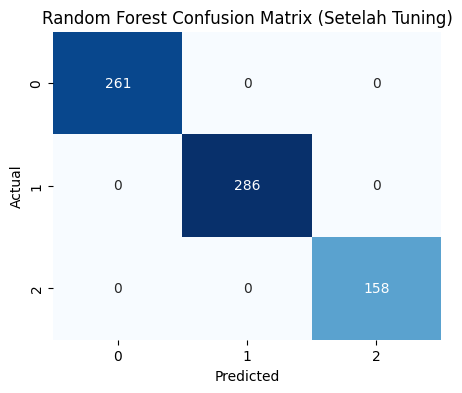

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix (Setelah Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()